## Access to Zarr Data

Some datasets from the Open Data Portal have been migrated to the Zarr format. This allows for faster opening and processing, so it makes sense to check whether data is provided in the Zarr format first.

The data is available via store abbreviation 'cci-zarr-store'.

In [2]:
from xcube.core.store import new_data_store

In [3]:
zarr_store = new_data_store('esa-cci-zarr')

Again, let's see what data sets are available. 

In [4]:
datasets = zarr_store.list_data_ids()
datasets

['ESACCI-BIOMASS-L4-AGB-MERGED-100m-2010-2018-fv2.0.zarr',
 'ESACCI-BIOMASS-L4-AGB-MERGED-100m-2010-2020-fv4.0.zarr',
 'ESACCI-GHG-L2-CH4-SCIAMACHY-WFMD-2002-2011-fv1.zarr',
 'ESACCI-GHG-L2-CO2-OCO-2-FOCAL-2014-2021-v10.zarr',
 'ESACCI-GHG-L2-CO2-SCIAMACHY-WFMD-2002-2012-fv1.zarr',
 'ESACCI-ICESHEETS_Antarctica_GMB-2002-2016-v1.1.zarr',
 'ESACCI-ICESHEETS_Greenland_GMB-2003-2016-v1.1.zarr',
 'ESACCI-L3C_CLOUD-CLD_PRODUCTS-AVHRR_NOAA-1982-2016-fv3.0.zarr',
 'ESACCI-L3C_SNOW-SWE-1979-2018-fv1.0.zarr',
 'ESACCI-L3C_SNOW-SWE-1979-2020-fv2.0.zarr',
 'ESACCI-L4_GHRSST-SST-GMPE-GLOB_CDR2.0-1981-2016-v02.0-fv01.0.zarr',
 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-1992-2015-v2.0.7b.zarr',
 'ESACCI-LST-L3C-LST-MODISA-0.01deg_1DAILY_DAY-2002-2018-fv3.00.zarr',
 'ESACCI-LST-L3C-LST-MODISA-0.01deg_1DAILY_NIGHT-2002-2018-fv3.00.zarr',
 'ESACCI-LST-L3S-LST-IRCDR_-0.01deg_1DAILY_DAY-1995-2020-fv3.00.zarr',
 'ESACCI-LST-L3S-LST-IRCDR_-0.01deg_1DAILY_NIGHT-1995-2020-fv3.00.zarr',
 'ESACCI-LST-L3S-LST-IRCDR_-0.01de

The names are similar but different to the ones from the Climate Toolbox store.
We can have a look at a dataset's metadata to find out more about it.

In [5]:
zarr_store.describe_data('ESACCI-SEAICE-L3C-SITHICK-SIRAL_CRYOSAT2-NH25KMEASE2-2010-2017-fv2.0.zarr')

Cubes can easily be opened from the store like this:

In [6]:
cube = zarr_store.open_data('ESACCI-SEAICE-L3C-SITHICK-SIRAL_CRYOSAT2-NH25KMEASE2-2010-2017-fv2.0.zarr')
cube

<xarray.Dataset> Size: 263MB
Dimensions:                        (time: 48, yc: 432, xc: 432, nv: 2)
Coordinates:
    lat                            (yc, xc) float64 1MB dask.array<chunksize=(432, 432), meta=np.ndarray>
    lon                            (yc, xc) float64 1MB dask.array<chunksize=(432, 432), meta=np.ndarray>
  * time                           (time) datetime64[ns] 384B 2010-11-01 ... ...
    time_bnds                      (time, nv) datetime64[ns] 768B dask.array<chunksize=(24, 2), meta=np.ndarray>
  * xc                             (xc) float64 3kB -5.388e+03 ... 5.388e+03
  * yc                             (yc) float64 3kB 5.388e+03 ... -5.388e+03
Dimensions without coordinates: nv
Data variables:
    Lambert_Azimuthal_Grid         int8 1B ...
    freeboard                      (time, yc, xc) float32 36MB dask.array<chunksize=(24, 432, 432), meta=np.ndarray>
    freeboard_uncertainty          (time, yc, xc) float32 36MB dask.array<chunksize=(24, 432, 432), meta=np.ndarray>
    radar_freeboard                (time, yc, xc) float32 36MB dask.array<chunksize=(24, 432, 432), meta=np.ndarray>
    radar_freeboard_uncertainty    (time, yc, xc) float32 36MB dask.array<chunksize=(24, 432, 432), meta=np.ndarray>
    sea_ice_concentration          (time, yc, xc) float32 36MB dask.array<chunksize=(24, 432, 432), meta=np.ndarray>
    sea_ice_thickness              (time, yc, xc) float32 36MB dask.array<chunksize=(24, 432, 432), meta=np.ndarray>
    sea_ice_thickness_uncertainty  (time, yc, xc) float32 36MB dask.array<chunksize=(24, 432, 432), meta=np.ndarray>
    status_flag                    (time, yc, xc) int8 9MB dask.array<chunksize=(24, 432, 432), meta=np.ndarray>
Attributes: (12/37)
    cdm_data_type:             Grid
    comment:                   Northern hemisphere sea ice thickness coverage...
    conventions:               CF-1.6
    creator_email:             stefan.hendricks@awi.de, stephan.paul@awi.de, ...
    creator_name:              Stefan Hendricks, Stephan Paul (Alfred Wegener...
    creator_url:               http://www.awi.de
    ...                        ...
    time_coverage_duration:    P1M
    time_coverage_end:         19700101T000001
    time_coverage_resolution:  P1M
    time_coverage_start:       19700101T000001
    title:                     ESA Climate Change Initiative Sea Ice: Norther...
    tracking_id:               6a71bb60-e10b-4dca-a50c-c79a13bc3393

... and we can plot the data.

In [8]:
import matplotlib.pyplot as plt

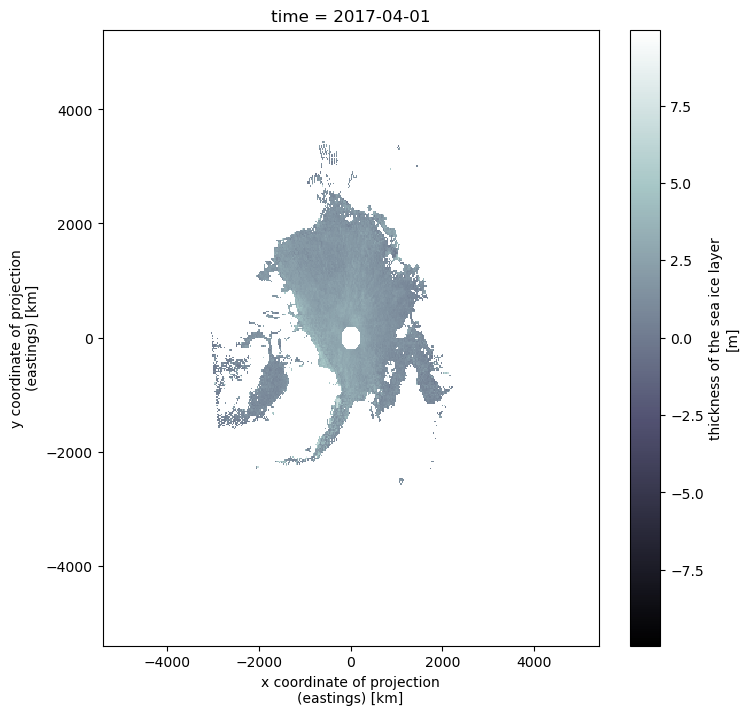

In [9]:
# plot a single time point
cube.sea_ice_thickness.sel(time='2017-11-01 12:00:00', method='nearest').plot.imshow(cmap='bone', figsize=(8, 8))

In [7]:
times = cube.time

In [10]:
# generate plots for the whole timeseries

plots = []
files = []

for i in range(len(times)):
    t = times[i]
    plots.append(cube.sea_ice_thickness.sel(time=t, method='nearest').plot.imshow(cmap='bone', figsize=(8, 8), vmin=-2, vmax=5))
    if i < 10:
        i = "0" + str(i)
    filename = "seaIce-CryoSat2-" + str(i) + ".jpg" 
    files.append(filename)
    plt.savefig(filename)
    plt.close()